In [5]:
import pandas as pd
weather=pd.read_csv("weather.csv",index_col="DATE")

In [6]:
weather

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
1975-01-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0.63,NaN,52,55.0,NaN
1975-01-02,IN022021900,"NEW DELHI SAFDARJUN, IN",0.02,NaN,53,63.0,43.0
1975-01-03,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,NaN,52,64.0,45.0
1975-01-04,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,NaN,54,66.0,43.0
1975-01-05,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,NaN,53,68.0,43.0
...,...,...,...,...,...,...,...
2024-08-03,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,NaN,88,NaN,81.0
2024-08-04,IN022021900,"NEW DELHI SAFDARJUN, IN",0.02,NaN,87,NaN,NaN
2024-08-05,IN022021900,"NEW DELHI SAFDARJUN, IN",0.20,NaN,87,97.0,79.0


In [7]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.440592
SNWD       0.999944
TAVG       0.000000
TMAX       0.108131
TMIN       0.163003
dtype: float64

In [8]:
valid_columns = weather.columns[null_pct < .17]
valid_columns

Index(['STATION', 'NAME', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [9]:
weather = weather[valid_columns].copy()

In [10]:
weather.columns = weather.columns.str.lower()

In [11]:
weather

,station,name,tavg,tmax,tmin
DATE,,,,,
1975-01-01,IN022021900,"NEW DELHI SAFDARJUN, IN",52,55.0,NaN
1975-01-02,IN022021900,"NEW DELHI SAFDARJUN, IN",53,63.0,43.0
1975-01-03,IN022021900,"NEW DELHI SAFDARJUN, IN",52,64.0,45.0
1975-01-04,IN022021900,"NEW DELHI SAFDARJUN, IN",54,66.0,43.0
1975-01-05,IN022021900,"NEW DELHI SAFDARJUN, IN",53,68.0,43.0
...,...,...,...,...,...
2024-08-03,IN022021900,"NEW DELHI SAFDARJUN, IN",88,NaN,81.0
2024-08-04,IN022021900,"NEW DELHI SAFDARJUN, IN",87,NaN,NaN
2024-08-05,IN022021900,"NEW DELHI SAFDARJUN, IN",87,97.0,79.0


In [12]:
weather = weather.ffill()

In [14]:
weather.apply(pd.isnull).sum()

station    0
name       0
tavg       0
tmax       0
tmin       1
dtype: int64

In [15]:
weather['tmin'].bfill(inplace=True)


In [16]:
weather.apply(pd.isnull).sum()

station    0
name       0
tavg       0
tmax       0
tmin       0
dtype: int64

In [17]:
weather

,station,name,tavg,tmax,tmin
DATE,,,,,
1975-01-01,IN022021900,"NEW DELHI SAFDARJUN, IN",52,55.0,43.0
1975-01-02,IN022021900,"NEW DELHI SAFDARJUN, IN",53,63.0,43.0
1975-01-03,IN022021900,"NEW DELHI SAFDARJUN, IN",52,64.0,45.0
1975-01-04,IN022021900,"NEW DELHI SAFDARJUN, IN",54,66.0,43.0
1975-01-05,IN022021900,"NEW DELHI SAFDARJUN, IN",53,68.0,43.0
...,...,...,...,...,...
2024-08-03,IN022021900,"NEW DELHI SAFDARJUN, IN",88,92.0,81.0
2024-08-04,IN022021900,"NEW DELHI SAFDARJUN, IN",87,92.0,81.0
2024-08-05,IN022021900,"NEW DELHI SAFDARJUN, IN",87,97.0,79.0


In [18]:

weather.dtypes

station     object
name        object
tavg         int64
tmax       float64
tmin       float64
dtype: object

In [19]:
weather.index

Index(['1975-01-01', '1975-01-02', '1975-01-03', '1975-01-04', '1975-01-05',
       '1975-01-06', '1975-01-07', '1975-01-08', '1975-01-09', '1975-01-10',
       ...
       '2024-07-29', '2024-07-30', '2024-07-31', '2024-08-01', '2024-08-02',
       '2024-08-03', '2024-08-04', '2024-08-05', '2024-08-06', '2024-08-07'],
      dtype='object', name='DATE', length=17969)

In [20]:
weather.index = pd.to_datetime(weather.index)

In [21]:
weather.index

DatetimeIndex(['1975-01-01', '1975-01-02', '1975-01-03', '1975-01-04',
               '1975-01-05', '1975-01-06', '1975-01-07', '1975-01-08',
               '1975-01-09', '1975-01-10',
               ...
               '2024-07-29', '2024-07-30', '2024-07-31', '2024-08-01',
               '2024-08-02', '2024-08-03', '2024-08-04', '2024-08-05',
               '2024-08-06', '2024-08-07'],
              dtype='datetime64[ns]', name='DATE', length=17969, freq=None)

In [23]:
weather.index.year.value_counts().sort_index()
## to check gaps

DATE
1975    364
1976    359
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    364
1985    365
1986    365
1987    364
1988    359
1989    363
1990    349
1991    356
1992    311
1993    363
1994    361
1995    364
1996    366
1997    365
1998    363
1999    362
2000    366
2001    364
2002    364
2003    365
2004    366
2005    365
2006    365
2007    362
2008    366
2009    365
2010    361
2011    360
2012    366
2013    365
2014    365
2015    365
2016    365
2017    363
2018    365
2019    361
2020    366
2021    362
2022    365
2023    363
2024    210
Name: count, dtype: int64

<Axes: xlabel='DATE'>

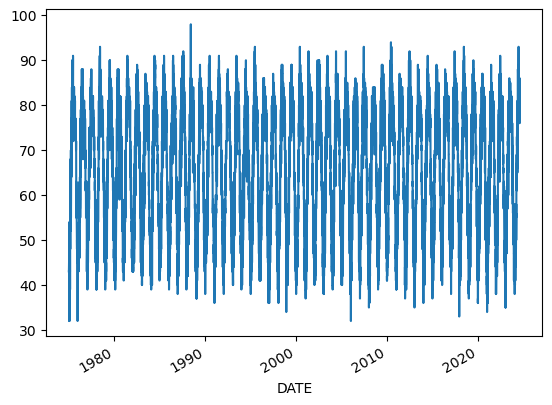

In [24]:
weather["tmin"].plot()

In [25]:
weather

,station,name,tavg,tmax,tmin
DATE,,,,,
1975-01-01,IN022021900,"NEW DELHI SAFDARJUN, IN",52,55.0,43.0
1975-01-02,IN022021900,"NEW DELHI SAFDARJUN, IN",53,63.0,43.0
1975-01-03,IN022021900,"NEW DELHI SAFDARJUN, IN",52,64.0,45.0
1975-01-04,IN022021900,"NEW DELHI SAFDARJUN, IN",54,66.0,43.0
1975-01-05,IN022021900,"NEW DELHI SAFDARJUN, IN",53,68.0,43.0
...,...,...,...,...,...
2024-08-03,IN022021900,"NEW DELHI SAFDARJUN, IN",88,92.0,81.0
2024-08-04,IN022021900,"NEW DELHI SAFDARJUN, IN",87,92.0,81.0
2024-08-05,IN022021900,"NEW DELHI SAFDARJUN, IN",87,97.0,79.0


In [26]:
weather["target"]=weather.shift(-1)["tmax"]
weather
## creating new column and shifting data of tmax by 1 up and putting it in new col target

,station,name,tavg,tmax,tmin,target
DATE,,,,,,
1975-01-01,IN022021900,"NEW DELHI SAFDARJUN, IN",52,55.0,43.0,63.0
1975-01-02,IN022021900,"NEW DELHI SAFDARJUN, IN",53,63.0,43.0,64.0
1975-01-03,IN022021900,"NEW DELHI SAFDARJUN, IN",52,64.0,45.0,66.0
1975-01-04,IN022021900,"NEW DELHI SAFDARJUN, IN",54,66.0,43.0,68.0
1975-01-05,IN022021900,"NEW DELHI SAFDARJUN, IN",53,68.0,43.0,70.0
...,...,...,...,...,...,...
2024-08-03,IN022021900,"NEW DELHI SAFDARJUN, IN",88,92.0,81.0,92.0
2024-08-04,IN022021900,"NEW DELHI SAFDARJUN, IN",87,92.0,81.0,97.0
2024-08-05,IN022021900,"NEW DELHI SAFDARJUN, IN",87,97.0,79.0,97.0


In [27]:
weather = weather.ffill()

In [28]:
weather

,station,name,tavg,tmax,tmin,target
DATE,,,,,,
1975-01-01,IN022021900,"NEW DELHI SAFDARJUN, IN",52,55.0,43.0,63.0
1975-01-02,IN022021900,"NEW DELHI SAFDARJUN, IN",53,63.0,43.0,64.0
1975-01-03,IN022021900,"NEW DELHI SAFDARJUN, IN",52,64.0,45.0,66.0
1975-01-04,IN022021900,"NEW DELHI SAFDARJUN, IN",54,66.0,43.0,68.0
1975-01-05,IN022021900,"NEW DELHI SAFDARJUN, IN",53,68.0,43.0,70.0
...,...,...,...,...,...,...
2024-08-03,IN022021900,"NEW DELHI SAFDARJUN, IN",88,92.0,81.0,92.0
2024-08-04,IN022021900,"NEW DELHI SAFDARJUN, IN",87,92.0,81.0,97.0
2024-08-05,IN022021900,"NEW DELHI SAFDARJUN, IN",87,97.0,79.0,97.0


## Machine Learning Model

In [30]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)

In [31]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
## all col except this-----

In [32]:
predictors

Index(['tavg', 'tmax', 'tmin'], dtype='object')

In [33]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [34]:
predictions = backtest(weather, rr, predictors)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

2.289327496063395

In [36]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1997-06-18,82.0,103.217983,21.217983
1993-06-23,81.0,100.794128,19.794128
2000-12-31,57.0,76.345208,19.345208
1988-03-07,72.0,90.935419,18.935419
2015-02-28,66.0,84.845239,18.845239
...,...,...,...
2021-05-28,104.0,103.998635,0.001365
1999-03-26,90.0,90.000854,0.000854
2000-06-02,102.0,102.000697,0.000697


In [37]:
pd.Series(rr.coef_, index=predictors)

tavg    0.457099
tmax    0.633792
tmin   -0.142904
dtype: float64

In [39]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin"]:
        weather = compute_rolling(weather, horizon, col)

In [41]:

def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [42]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [43]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [44]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

2.2518236499354027

In [45]:
mean_squared_error(predictions["actual"], predictions["prediction"])

9.769418353160626

In [46]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1997-06-18,82.0,103.157562,21.157562
1993-06-23,81.0,101.269700,20.269700
1996-06-08,86.0,104.901685,18.901685
2000-12-31,57.0,75.488887,18.488887
2006-06-01,89.0,107.277540,18.277540
...,...,...,...
2018-03-06,84.0,84.001273,0.001273
2018-11-21,84.0,84.001009,0.001009
1991-01-23,74.0,74.000747,0.000747


In [47]:
weather.loc["1990-03-07": "1990-03-17"]

,station,name,tavg,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin
DATE,,,,,,,,,,,,,,,,,,
1990-03-07,IN022021900,"NEW DELHI SAFDARJUN, IN",63,79.0,52.0,82.0,77.333333,0.021552,50.666667,0.026316,72.714286,0.086444,51.500000,0.009709,84.312102,81.8125,59.171975,56.2500
1990-03-08,IN022021900,"NEW DELHI SAFDARJUN, IN",67,82.0,52.0,87.0,79.000000,0.037975,51.666667,0.006452,73.214286,0.120000,51.500000,0.009709,84.307203,81.2500,59.156780,55.2500
1990-03-09,IN022021900,"NEW DELHI SAFDARJUN, IN",70,87.0,53.0,87.0,82.666667,0.052419,52.333333,0.012739,73.857143,0.177950,51.571429,0.027701,84.312896,81.8750,59.143763,56.5625
1990-03-10,IN022021900,"NEW DELHI SAFDARJUN, IN",71,87.0,59.0,80.0,85.333333,0.019531,54.666667,0.079268,75.500000,0.152318,52.071429,0.133059,84.318565,83.3750,59.143460,58.7500
1990-03-11,IN022021900,"NEW DELHI SAFDARJUN, IN",70,80.0,59.0,81.0,84.666667,-0.055118,57.000000,0.035088,76.214286,0.049672,52.357143,0.126876,84.309474,82.5625,59.143158,58.8125
1990-03-12,IN022021900,"NEW DELHI SAFDARJUN, IN",71,81.0,56.0,81.0,82.666667,-0.020161,58.000000,-0.034483,76.785714,0.054884,52.500000,0.066667,84.302521,81.8125,59.136555,58.3125
1990-03-13,IN022021900,"NEW DELHI SAFDARJUN, IN",68,81.0,57.0,84.0,80.666667,0.004132,57.333333,-0.005814,77.642857,0.043238,52.571429,0.084239,84.295597,82.7500,59.132075,56.6875
1990-03-14,IN022021900,"NEW DELHI SAFDARJUN, IN",71,84.0,56.0,85.0,82.000000,0.024390,56.333333,-0.005917,78.928571,0.064253,52.571429,0.065217,84.294979,83.9375,59.125523,56.9375
1990-03-15,IN022021900,"NEW DELHI SAFDARJUN, IN",74,85.0,62.0,88.0,83.333333,0.020000,58.333333,0.062857,79.857143,0.064401,53.642857,0.155792,84.296451,83.3125,59.131524,58.7500


<Axes: xlabel='diff'>

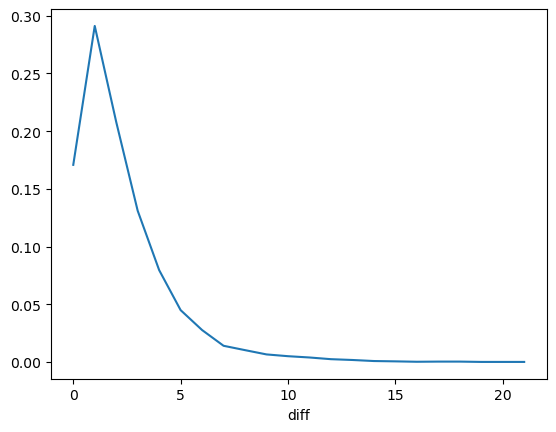

In [48]:

(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [49]:

predictions

,actual,prediction,diff
DATE,,,
1985-01-22,70.0,70.131385,0.131385
1985-01-23,71.0,69.647942,1.352058
1985-01-24,74.0,70.024451,3.975549
1985-01-25,73.0,72.231857,0.768143
1985-01-26,73.0,73.155632,0.155632
...,...,...,...
2024-08-03,92.0,93.909240,1.909240
2024-08-04,97.0,93.411247,3.588753
2024-08-05,97.0,96.246744,0.753256
